In [1]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# con_evs = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb.sqlite"))
# con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-Pharma.sqlite"))
# con_tech = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-Tech2.sqlite"))
# con_oil = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-Oil.sqlite"))

In [40]:
# ev_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count WHERE category = 'EVs'", con_evs)
# oi_df = pd.read_sql_query(f"SELECT * from oil_tweets_count", con_oil)
# te_df = pd.read_csv(os.path.join(os.getcwd(), "../Datasets/NewTechTweetData.csv"), delimiter="\t")
# ph_df = pd.read_sql_query(f"SELECT * from pharma_tweets_count", con_pharma)

c:\users\svish\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


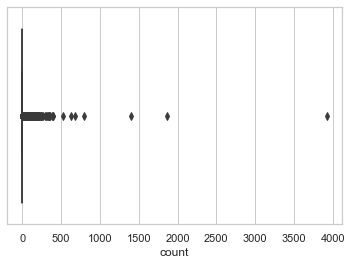

In [41]:
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(ev_df['count'], palette='crest')
# plt.savefig('images/boxplot-EVs-nofilter', transparent=True, dpi=400)

In [42]:
# ev_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count WHERE category = 'EVs' AND count > 1", con_evs)

In [43]:
# ev_df['count'] = ev_df['count'].apply(lambda x: 15 if x > 15 else x) 

c:\users\svish\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


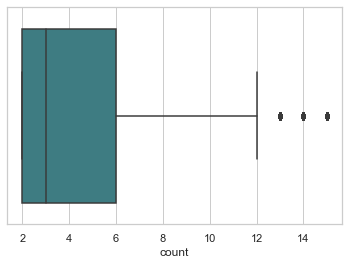

In [44]:
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(ev_df['count'], palette='crest')
# plt.savefig('images/boxplot-EVs-filter', transparent=True, dpi=400)

In [3]:
con = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb.sqlite"))

In [4]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count WHERE category = 'EVs'", con)

In [5]:
len(tweet_df['tweetDate'].unique())

723

In [6]:
tweet_df['count'].value_counts()

1       88791
2       13758
3        3681
4        1750
10       1593
5        1101
9        1066
8         882
6         830
7         798
20        198
18        156
12        138
11        137
14        112
13        109
16        106
15         71
21         67
17         61
30         58
27         47
19         42
24         41
28         39
26         33
23         32
40         31
22         29
25         28
31         27
32         22
36         20
37         19
50         19
29         18
33         15
38         14
35         14
60         14
39         13
34         12
45         12
47         11
43         11
51         11
46         11
41         10
72          9
42          9
54          9
48          9
68          8
44          8
53          7
56          7
58          7
70          7
52          5
59          5
63          5
71          5
64          5
77          5
140         5
78          4
55          4
79          4
98          4
75          4
87          4
61    

In [7]:
tweet_df.describe()

,count
count,116355.000000
mean,2.249340
std,15.534523
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3922.000000


<AxesSubplot:>

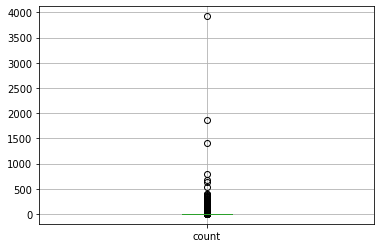

In [8]:
tweet_df.boxplot()

In [12]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count WHERE category = 'EVs'", con)

In [13]:
tweet_df.describe()

,count
count,116355.000000
mean,2.249340
std,15.534523
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3922.000000


<AxesSubplot:>

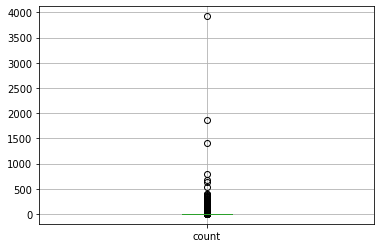

In [14]:
tweet_df.boxplot()

In [15]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 15 if x > 15 else x) 

In [16]:
tweet_df.describe()

,count
count,116355.000000
mean,1.833045
std,2.366175
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


<AxesSubplot:>

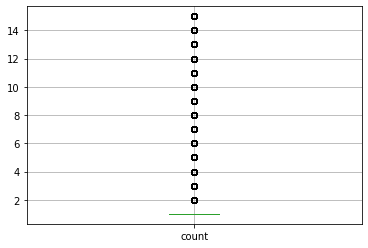

In [17]:
tweet_df.boxplot()

In [18]:
len(tweet_df['tweetDate'].unique())

723

In [19]:
tweet_df['count'].value_counts()

1     88791
2     13758
3      3681
4      1750
15     1609
10     1593
5      1101
9      1066
8       882
6       830
7       798
12      138
11      137
14      112
13      109
Name: count, dtype: int64

In [1]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS new_reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('new_reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [21]:
con = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-EVs2.sqlite"))

In [22]:
write_to_db(con, tweet_df)

In [23]:
tweet_df['tweetDate'].value_counts()

2021-10-25    390
2021-10-28    390
2021-10-29    389
2021-11-08    331
2021-11-16    329
             ... 
2021-07-12     68
2021-07-18     63
2021-08-08     50
2021-02-28     41
2021-08-15     36
Name: tweetDate, Length: 723, dtype: int64